# Womens clothing reviews text analytics

Data Description:

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [52]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv").rename(columns = {"Unnamed: 0":'original_ind'})

In [53]:
data.sample(10)

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4369,4369,1094,31,NaN,NaN,5,1,0,General,Dresses,Dresses
17561,17561,515,61,Beautiful swimsuit,This swimsuit is beautiful. the quality is exc...,5,1,0,Initmates,Intimate,Swim
12177,12177,1074,50,So gorgeous,"I did the happy dance when the dress arrived, ...",5,1,2,General,Dresses,Dresses
11655,11655,850,57,NaN,NaN,5,1,0,General Petite,Tops,Blouses
2561,2561,1095,51,NaN,This dress fits true to sizing for this dress ...,4,1,9,General,Dresses,Dresses
4670,4670,878,31,Super soft,This shirt is super soft and comfortable! luck...,5,1,0,General,Tops,Knits
12171,12171,865,34,Not as expected,I really loved the colors and style of this to...,2,0,1,General,Tops,Knits
1097,1097,895,48,Great piece,Comfortable and great fit and color. high qual...,5,1,1,General,Tops,Fine gauge
1555,1555,1022,26,Dream pants do come true,Let it be known that i hate shopping for jeans...,5,1,4,General,Bottoms,Jeans
18988,18988,42,25,Love this!,I was so excited to receive this in the mail. ...,5,1,1,Initmates,Intimate,Intimates


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   original_ind             23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [55]:
data.describe()

,original_ind,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [56]:
data.describe(include = ['object'])

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


<Figure size 432x288 with 0 Axes>

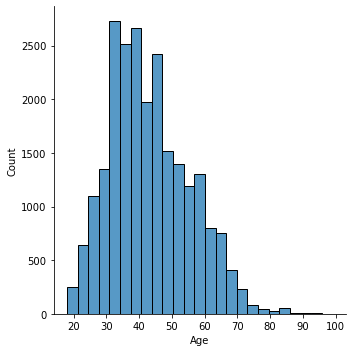

In [57]:
# Overview of age of customers
plt.figure(figsize=(6,4))
sns.displot(data.Age,bins = 25)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


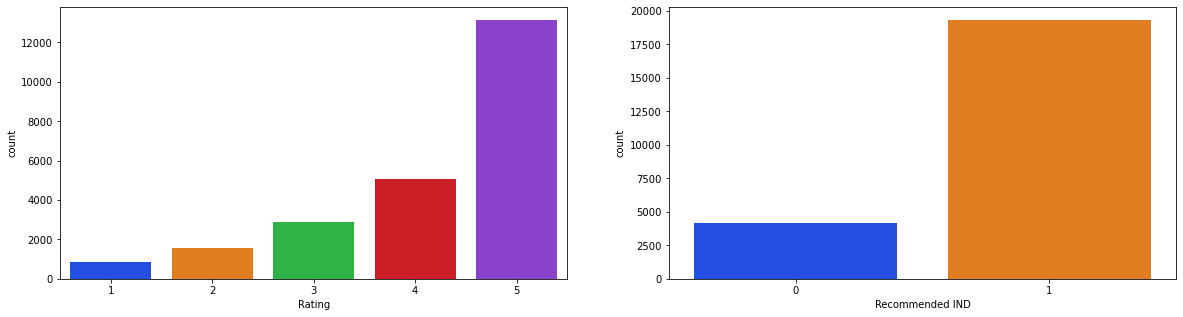

In [58]:
# Overview of recommendations and rtings
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data.Rating, palette='bright')
plt.subplot(1,2,2)
sns.countplot(data['Recommended IND'], palette='bright')
plt.show()

In [59]:
data[data['Class Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [60]:
data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [61]:
data['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [62]:
data['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [63]:
# Drop all the rows where review text is null

In [64]:
df = data[data['Review Text'].notna()]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   original_ind             22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    19675 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   Recommended IND          22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [66]:
df[df['Class Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
21532,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [67]:
# Fill NA for Division, Department, and Class
for idx, row in df[df['Class Name'].isna()].iterrows():
    if ("socks" in row['Review Text']) or ("leg warmers" in row['Review Text']):
        df.at[idx, 'Division Name'] = 'Intimates'
        df.at[idx, 'Department Name'] = 'Intimate'
        df.at[idx, 'Class Name'] = 'Legwear'
        
    elif ("hoodie" in row['Review Text']) or ("sweatshirt" in row['Review Text']):
        df.at[idx, 'Division Name'] = 'General'
        df.at[idx, 'Department Name'] = 'Tops'
        df.at[idx, 'Class Name'] = 'Knits'
 
    elif "tights" in row['Review Text']:
        df.at[idx, 'Division Name'] = 'General'
        df.at[idx, 'Department Name'] = 'Bottoms'
        df.at[idx, 'Class Name'] = 'Pants'


In [68]:
df[df['Class Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
21532,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [69]:
df[df['Division Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
21532,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [70]:
df[df['Department Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
21532,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [71]:
df.dropna(subset=['Department Name'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\1103154742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Department Name'], inplace=True)


In [72]:
df[df['Department Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [73]:
df[df['Division Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [74]:
df[df['Class Name'].isna()]

,original_ind,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [75]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'],
      dtype=object)

In [76]:
#rename columns so that no space in feature names
column_names = {'Clothing ID':'clothing_ID','Review Text':'RAW_Text',
                'Recommended IND':'Reco','Positive Feedback Count':'Positive_fb_count',"Division Name":'Division',
               'Department Name':'Department','Class Name':'Class'}
df = df.rename(columns = column_names)

Text(0.5, 0, 'Number of reviews')

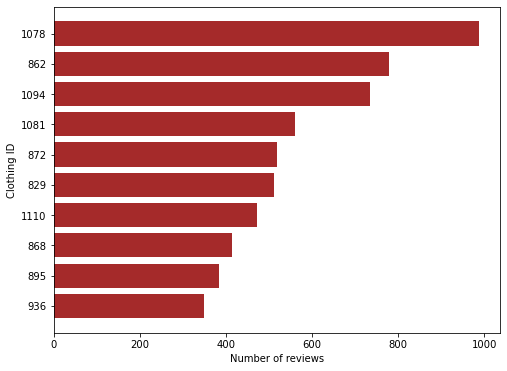

In [77]:
plt.figure(figsize=(8,6))

clothing_count = [c[1] for c in Counter(df.clothing_ID).most_common(10)]
clothing_id = [c[0] for c in Counter(df.clothing_ID).most_common(10)]
pos = np.arange(len(clothing_id))
plt.barh(pos,clothing_count[::-1], tick_label = clothing_id[::-1],color = 'brown')
plt.ylabel('Clothing ID')
plt.xlabel('Number of reviews')

<Figure size 792x432 with 0 Axes>

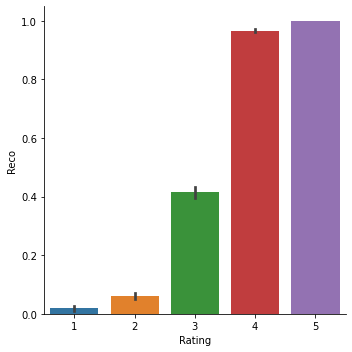

In [78]:
plt.figure(figsize=(11,6))
sns.catplot(x='Rating',y='Reco',data = df,kind='bar')

We have two target variable of the project: Rating and Recommendation; For Rating we need to transform into binary: Ratings 4 & 5 will be categorized as positive and 1-3 as Not positive (neutral or negative)

In [79]:
df['rating_bi'] = df.Rating.apply(lambda x: np.where(x>3,1,0))

<AxesSubplot:xlabel='rating_bi', ylabel='count'>

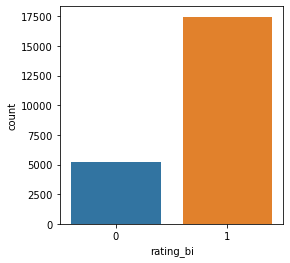

In [80]:
plt.figure(figsize=(4,4))
sns.countplot(x='rating_bi',data = df)

# Text processing

In [81]:
#strip all punctuation, lower text
df['Text'] = df.RAW_Text.str.replace(r"\W","").str.lower()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\2212635942.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df.RAW_Text.str.replace(r"\W","").str.lower()


In [82]:
df['Title'] = df.Title.str.replace(r"\W"," ").str.lower()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\1669956243.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df.Title.str.replace(r"\W"," ").str.lower()


In [83]:
Counter(df.Positive_fb_count)[0]/df.Positive_fb_count.count()

0.45624420197022575

We keep column positive feedback for now though it has 45% 0's

In [84]:
# Counter(df.Positive_fb_count)

In [85]:
# df.Positive_fb_count.unique()

<AxesSubplot:>

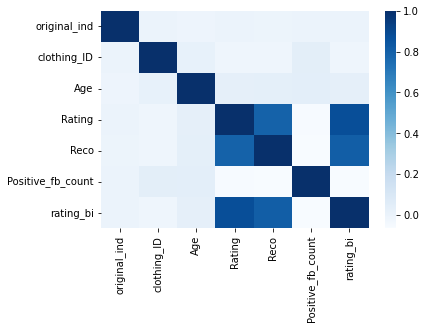

In [86]:
sns.heatmap(df.corr(),cmap = 'Blues')

Note the recommendation and rating is highly correlated

In [87]:
df['review_len'] = df.Text.str.len()

In [88]:
#convert categorical features as category types
categorical_features = ['Division','Department','Class']

for column in categorical_features:
    category = list(df[column].unique())
    cat_dtype = pd.api.types.CategoricalDtype(categories=category)
    df[column] = df[column].astype(cat_dtype)

In [89]:
df = df.set_index('original_ind').rename(columns = {'rating_bi':"Positively_rated"})

In [90]:
columns_to_keep = ['clothing_ID','Age','Title','Text','RAW_Text','review_len','Positive_fb_count','Division','Department','Class','Positively_rated','Reco']
df = df[columns_to_keep]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22637 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   clothing_ID        22637 non-null  int64   
 1   Age                22637 non-null  int64   
 2   Title              19671 non-null  object  
 3   Text               22637 non-null  object  
 4   RAW_Text           22637 non-null  object  
 5   review_len         22637 non-null  int64   
 6   Positive_fb_count  22637 non-null  int64   
 7   Division           22637 non-null  category
 8   Department         22637 non-null  category
 9   Class              22637 non-null  category
 10  Positively_rated   22637 non-null  int64   
 11  Reco               22637 non-null  int64   
dtypes: category(3), int64(6), object(3)
memory usage: 1.8+ MB


In [92]:
df.to_pickle('cleaned_df1.pkl')

# Our next step is to preprocess review text and review title & start fitting some model

<Figure size 792x432 with 0 Axes>

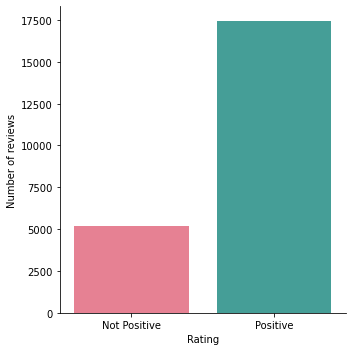

In [47]:
plt.figure(figsize=(11,6))
g = sns.catplot(x='Positively_rated',data = df,kind='count',palette = 'husl')
ax = plt.gca()
ax.set_xticklabels(['Not Positive','Positive'])
ax.set_xlabel('Rating')
ax.set_ylabel('Number of reviews')
plt.show()

In [48]:
df

,clothing_ID,Age,Title,Text,RAW_Text,review_len,Positive_fb_count,Division,Department,Class,Positively_rated,Reco
original_ind,,,,,,,,,,,,
0,767,33,NaN,absolutely wonderful silky and sexy and comf...,Absolutely wonderful - silky and sexy and comf...,53,0,Initmates,Intimate,Intimates,1,1
1,1080,34,NaN,love this dress it s sooo pretty i happene...,Love this dress! it's sooo pretty. i happene...,303,4,General,Dresses,Dresses,1,1
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,I had such high hopes for this dress and reall...,500,0,General,Dresses,Dresses,0,0
3,1049,50,my favorite buy,i love love love this jumpsuit it s fun fl...,"I love, love, love this jumpsuit. it's fun, fl...",124,0,General Petite,Bottoms,Pants,1,1
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,This shirt is very flattering to all due to th...,192,6,General,Tops,Blouses,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,great dress for many occasions,i was very happy to snag this dress at such a ...,I was very happy to snag this dress at such a ...,131,0,General Petite,Dresses,Dresses,1,1
23482,862,48,wish it was made of cotton,it reminds me of maternity clothes soft stre...,"It reminds me of maternity clothes. soft, stre...",223,0,General Petite,Tops,Knits,0,1
23483,1104,31,cute but see through,this fit well but the top was very see throug...,"This fit well, but the top was very see throug...",208,1,General Petite,Dresses,Dresses,0,0


In [49]:
df.columns

Index(['clothing_ID', 'Age', 'Title', 'Text', 'RAW_Text', 'review_len',
       'Positive_fb_count', 'Division', 'Department', 'Class',
       'Positively_rated', 'Reco'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22637 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   clothing_ID        22637 non-null  int64   
 1   Age                22637 non-null  int64   
 2   Title              19671 non-null  object  
 3   Text               22637 non-null  object  
 4   RAW_Text           22637 non-null  object  
 5   review_len         22637 non-null  int64   
 6   Positive_fb_count  22637 non-null  int64   
 7   Division           22637 non-null  category
 8   Department         22637 non-null  category
 9   Class              22637 non-null  category
 10  Positively_rated   22637 non-null  int64   
 11  Reco               22637 non-null  int64   
dtypes: category(3), int64(6), object(3)
memory usage: 1.8+ MB
